In [1]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import csv
import math
import scipy

import dataset
import datasplit
import model.models as models
import trainer
import utils
import pickle

# TEST on POLY CONTINUOUS

In [2]:
# LOAD
# folders
models_folder = 'G:/PracaMagisterska/Kod_na_magisterke/gfx-classifier_RNN_version-models_and_results/models'
model_name = '20201022_setnetcond_poly_cont_best'
results_folder = 'G:/PracaMagisterska/Kod_na_magisterke/gfx-classifier_RNN_version-models_and_results/result'
results_subfolder = '20201022_setnetcond_poly_cont'

# load model
setnetcond = torch.load('%s/%s' % (models_folder, model_name), map_location=torch.device('cpu'))

# results
with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'all_train_losses'), 'rb') as f:
    all_train_losses = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'all_train_correct'), 'rb') as f:
    all_train_correct = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'best_train_results'), 'rb') as f:
    best_train_results = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'all_val_losses'), 'rb') as f:
    all_val_losses = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'all_val_correct'), 'rb') as f:
    all_val_correct = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'best_val_results'), 'rb') as f:
    best_val_results = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'all_test_losses'), 'rb') as f:
    all_test_losses = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'all_test_correct'), 'rb') as f:
    all_test_correct = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'best_test_results'), 'rb') as f:
    best_test_results = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'fx_labels'), 'rb') as f:
    fx_labels = pickle.load(f)

# datasets sizes
train_set_size = len(best_train_results)
val_set_size = len(best_val_results)
test_set_size = len(best_test_results)

# example
print(best_train_results[0])

C:\Users\maszy\AppData\Local\Temp\ipykernel_8704\1518412186.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  setnetcond = torch.load('%s/%s' % (models_folder, model_name)

(72351, 'P64-57110-OD1-D6.7-41199', array([ 1.   ,  0.664, -1.   ], dtype=float32), array([ 1.  ,  0.67, -1.  ], dtype=float32))


Best Train Accuracy:  99.55341880341881
Epoch:  45

Best Val Accuracy:  99.0673076923077
Epoch:  44

Test Accuracy:  98.8576923076923
Epoch:  44



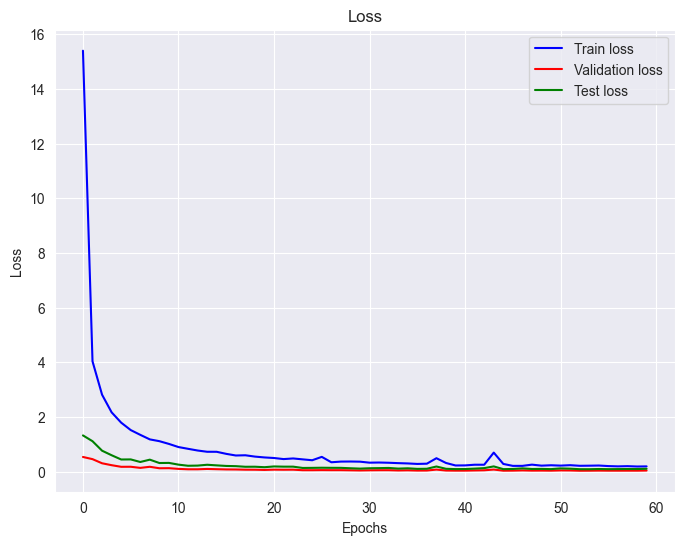

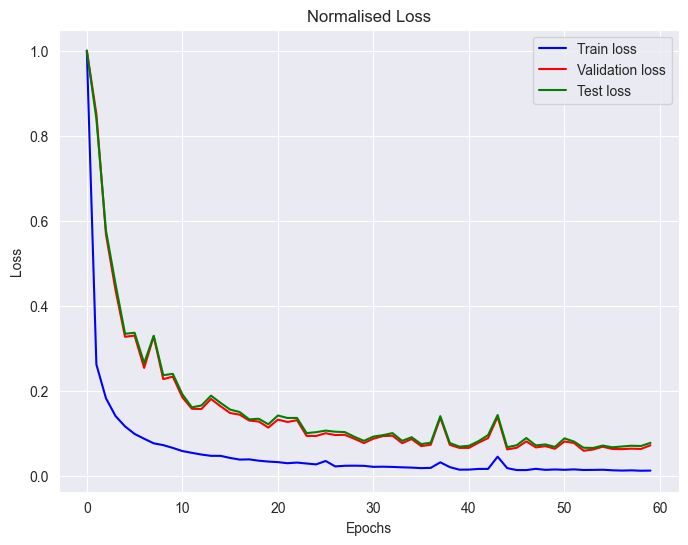

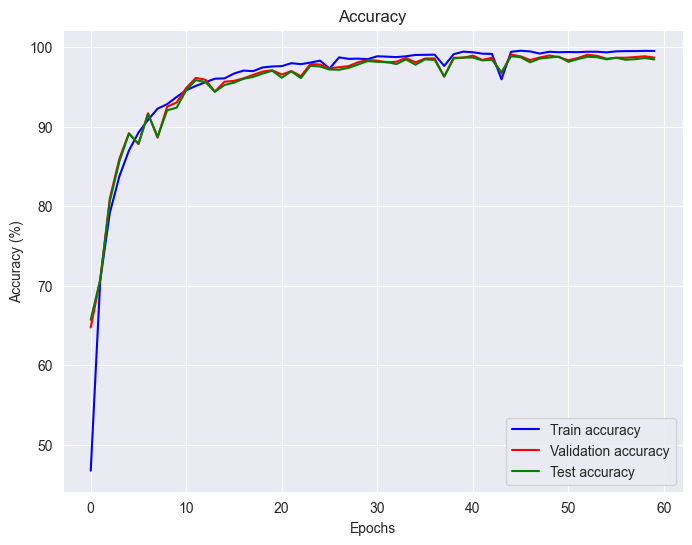

In [3]:
# Ustawienie ścieżki do zapisu
save_path = 'G:/PracaMagisterska/Kod_na_magisterke/gfx-classifier_RNN_version-models_and_results/result/figures/Setnetcond_poly_const_plots'

# BEST RESULTS
print('Best Train Accuracy: ', 100 * max(all_train_correct) / train_set_size)
print('Epoch: ', np.argmax(all_train_correct))
print()
print('Best Val Accuracy: ', 100 * max(all_val_correct) / val_set_size)
print('Epoch: ', np.argmax(all_val_correct))
print()
print('Test Accuracy: ', 100 * max(all_test_correct) / test_set_size)
print('Epoch: ', np.argmax(all_test_correct))
print()

# LOSS
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(8,6))
plt.grid(True)  # Włącza siatkę
plt.plot(epochs, all_train_losses, 'b', label='Train loss')
plt.plot(epochs, all_val_losses, 'r', label='Validation loss')
plt.plot(epochs, all_test_losses, 'g', label='Test loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'{save_path}/loss_plot.jpeg', format='jpeg')  # Zapisuje wykres w formacie JPEG
plt.show()

# NORMALISED LOSS
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(8,6))
plt.grid(True)  # Włącza siatkę
plt.plot(epochs, np.array(all_train_losses) / max(all_train_losses), 'b', label='Train loss')
plt.plot(epochs, np.array(all_val_losses) / max(all_val_losses), 'r', label='Validation loss')
plt.plot(epochs, np.array(all_test_losses) / max(all_test_losses), 'g', label='Test loss')
plt.title('Normalised Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'{save_path}/normalised_loss_plot.jpeg', format='jpeg')  # Zapisuje wykres w formacie JPEG
plt.show()

# ACCURACY
all_train_perc_correct = 100 * np.array(all_train_correct) / train_set_size
all_val_perc_correct = 100 * np.array(all_val_correct) / val_set_size
all_test_perc_correct = 100 * np.array(all_test_correct) / test_set_size
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(8,6))
plt.grid(True)  # Włącza siatkę
plt.plot(epochs, all_train_perc_correct, 'b', label='Train accuracy')
plt.plot(epochs, all_val_perc_correct, 'r', label='Validation accuracy')
plt.plot(epochs, all_test_perc_correct, 'g', label='Test accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.savefig(f'{save_path}/accuracy_plot.jpeg', format='jpeg')  # Zapisuje wykres w formacie JPEG
plt.show()

In [4]:
# Wyodrębnienie kolumn przy użyciu list comprehensions
test_indexes_poly_cont = [x[0] for x in best_test_results]
test_filenames_poly_cont = [x[1] for x in best_test_results]
test_preds_poly_cont = np.stack([x[2] for x in best_test_results])
test_targets_poly_cont = np.stack([x[3] for x in best_test_results])

# Obliczenia błędów
test_abs_err_poly_cont = np.abs(test_preds_poly_cont - test_targets_poly_cont)
test_err_poly_cont = test_preds_poly_cont - test_targets_poly_cont

# Tworzenie DataFrame
test_df_poly_cont = pd.DataFrame(data={
    'index': test_indexes_poly_cont, 
    'filename': test_filenames_poly_cont,
    'level_pred': test_preds_poly_cont[:, 0], 
    'gain_pred': test_preds_poly_cont[:, 1],
    'tone_eq1_pred': test_preds_poly_cont[:, 2], 
    'level_targ': test_targets_poly_cont[:, 0], 
    'gain_targ': test_targets_poly_cont[:, 1],
    'tone_eq1_targ': test_targets_poly_cont[:, 2], 
    'level_err': test_err_poly_cont[:, 0], 
    'gain_err': test_err_poly_cont[:, 1],
    'tone_eq1_err': test_err_poly_cont[:, 2], 
    'level_abs': test_abs_err_poly_cont[:, 0], 
    'gain_abs': test_abs_err_poly_cont[:, 1],
    'tone_eq1_abs': test_abs_err_poly_cont[:, 2], 
})

print(len(test_df_poly_cont))
test_df_poly_cont[:3]


26000


,index,filename,level_pred,gain_pred,tone_eq1_pred,level_targ,gain_targ,tone_eq1_targ,level_err,gain_err,tone_eq1_err,level_abs,gain_abs,tone_eq1_abs
0,81869,P64-54120-RAT-D4F1.4-41211,1.0,0.416,0.158,1.0,0.40,0.14,0.0,0.016,0.018,0.0,0.016,0.018
1,51092,P64-49170-FFC-F10-41281,1.0,0.997,-1.000,1.0,1.00,-1.00,0.0,-0.003,0.000,0.0,0.003,0.000
2,14434,P65-54260-BD2-G8.3T8.2-41376,1.0,0.829,0.766,1.0,0.83,0.82,0.0,-0.001,-0.054,0.0,0.001,0.054


In [5]:
# MAE
level_mae_poly_cont = sum(test_df_poly_cont.level_abs)/test_set_size
gain_mae_poly_cont = sum(test_df_poly_cont.gain_abs)/test_set_size
tone_eq1_mae_poly_cont = sum(test_df_poly_cont.tone_eq1_abs)/test_set_size

print('level_mae: ', level_mae_poly_cont)
print('gain_mae: ', gain_mae_poly_cont)
print('tone_eq1_mae: ', tone_eq1_mae_poly_cont)

# RMSE
level_rmse_poly_cont = math.sqrt(sum(test_df_poly_cont.level_abs**2)/test_set_size)
gain_rmse_poly_cont = math.sqrt(sum(test_df_poly_cont.gain_abs**2)/test_set_size)
tone_eq1_rmse_poly_cont = math.sqrt(sum(test_df_poly_cont.tone_eq1_abs**2)/test_set_size)

print('level_rmse: ', level_rmse_poly_cont)
print('gain_rmse: ', gain_rmse_poly_cont)
print('tone_eq1_rmse: ', tone_eq1_rmse_poly_cont)

level_mae:  2.3076625970693735e-07
gain_mae:  0.021032846660084592
tone_eq1_mae:  0.014102038385073403
level_rmse:  1.5190895331768638e-05
gain_rmse:  0.027333884817669477
tone_eq1_rmse:  0.02675053780517853


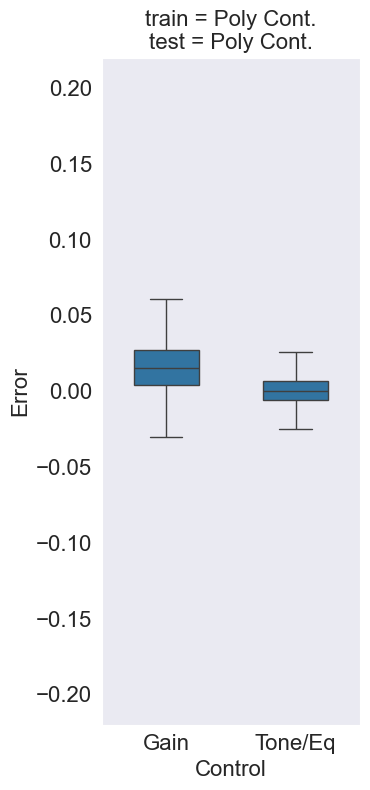

In [6]:
# BOX PLOT
err_df_poly_cont = pd.DataFrame(data={
    'Gain': test_df_poly_cont['gain_err'],
    'Tone/Eq': test_df_poly_cont['tone_eq1_err'],
})

plt.figure(figsize=(3.8,8))
plt.grid(False)
ax = utils.box_plot(error_dataframe=err_df_poly_cont, title='train = Poly Cont.\ntest = Poly Cont.', title_fontsize=16, text_fontsize=16)
ax.set(ylim=(-0.22,0.22))
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_bp_PC_PC.eps'), format='eps')

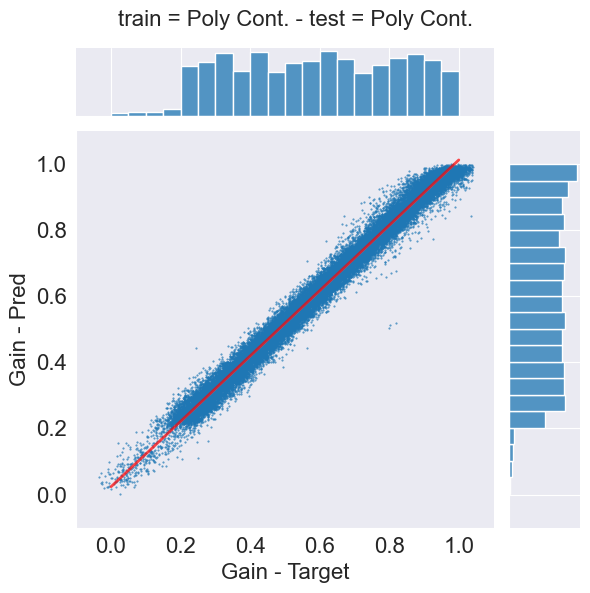

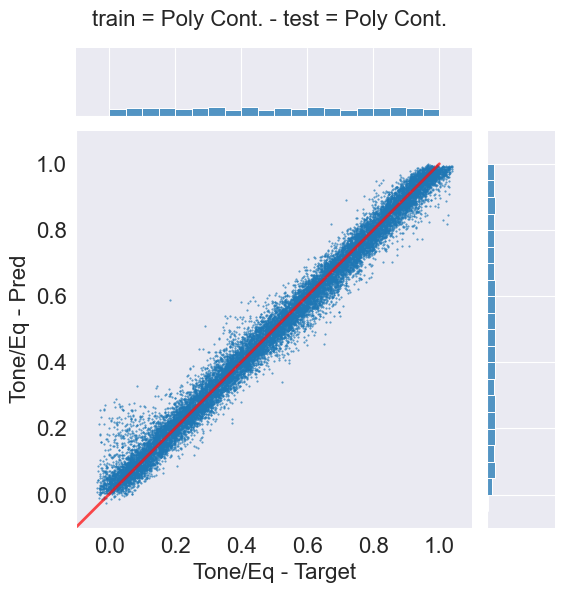

In [7]:
# SCATTER PLOT
# gain
ax = utils.scatter_plot(
    x="gain_targ", y="gain_pred", dataframe=test_df_poly_cont, 
    title='train = Poly Cont. - test = Poly Cont.', title_fontsize=16, 
    text_fontsize=16, xlabel='Gain - Target', ylabel='Gain - Pred'
)

ax.ax_marg_x.set_xlim(-0.1, 1.1)
ax.ax_marg_y.set_ylim(-0.1, 1.1)
plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_sp_gain_PC_PC.jpg'), dpi=500, format='jpg')

# tone/eq1
ax = utils.scatter_plot(
    x="tone_eq1_targ", y="tone_eq1_pred", dataframe=test_df_poly_cont, 
    title='train = Poly Cont. - test = Poly Cont.', title_fontsize=16, 
    text_fontsize=16, xlabel='Tone/Eq - Target', ylabel='Tone/Eq - Pred',
    bins=40
)

ax.ax_marg_x.set_xlim(-0.1, 1.1)
ax.ax_marg_y.set_ylim(-0.1, 1.1)
plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_sp_tone_PC_PC.jpg'), dpi=500, format='jpg')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


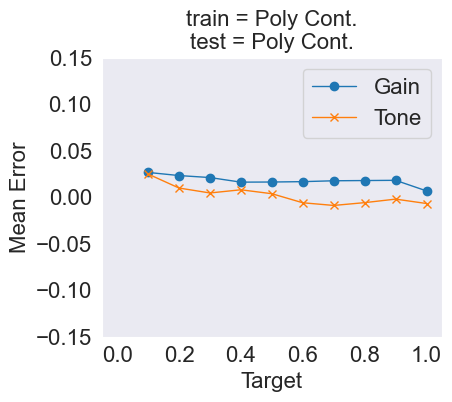

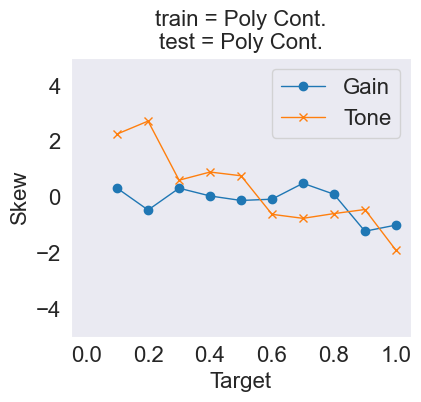

In [8]:
# MEAN ERROR and SKEW PLOT
step_size = 0.1
steps = np.linspace(start=0, stop=1, num=int(1/step_size + 1))
avg_err_gain = []
avg_err_tone = []
skew_gain = []
skew_tone = []

for n in range(len(steps)-1):
    df = test_df_poly_cont[(test_df_poly_cont['gain_targ'] >= steps[n]) & (test_df_poly_cont['gain_targ'] < steps[n+1])]
    avg_err_gain.append(sum(df['gain_err']) / len(df))
    skew_gain.append(scipy.stats.skew(df['gain_err']))

for n in range(len(steps)-1):
    df = test_df_poly_cont[(test_df_poly_cont['tone_eq1_targ'] >= steps[n]) & (test_df_poly_cont['tone_eq1_targ'] < steps[n+1])]
    avg_err_tone.append(sum(df['tone_eq1_err']) / len(df))
    skew_tone.append(scipy.stats.skew(df['tone_eq1_err']))

# print(np.around(avg_err_gain,3))
# print(np.around(avg_err_tone,3))

# mean error
plt.figure(figsize=(4.8,4.3))
utils.line_plot(
    x_gain=steps[1:], x_tone=steps[1:], 
    y_gain=avg_err_gain, y_tone=avg_err_tone, 
    title='train = Poly Cont.\ntest = Poly Cont.' , title_fontsize=16, 
    text_fontsize=16, xlabel='Target', ylabel='Mean Error'
)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.15, 0.15])
plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_me_PC_PC.eps'), format='eps')

# skew
plt.figure(figsize=(4.5,4.3))
ax = utils.line_plot(
    x_gain=steps[1:], x_tone=steps[1:], 
    y_gain=skew_gain, y_tone=skew_tone, 
    title='train = Poly Cont.\ntest = Poly Cont.' , title_fontsize=16, 
    text_fontsize=16, xlabel='Target', ylabel='Skew'
)

plt.xlim([-0.05, 1.05])
plt.ylim([-5, 5])
plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_sk_PC_PC.eps'), format='eps')

# TEST on POLY DISCRETE

In [9]:
# PREPARE
# dataset
dataset_poly_disc = dataset.FxDataset(
    root='G:/PracaMagisterska/Dane/Poly_Discret_Audio',
    excl_folders=['MT2'], 
    spectra_folder='mel_22050_1024_512', 
    processed_settings_csv='proc_settings.csv',
    max_num_settings=3,
    transform=transforms.Compose([transforms.ToTensor()])
)

dataset_poly_disc.init_dataset()
# dataset_poly_rnd.generate_mel()

# split
# set test_train_split=0.0 and val_train_split=0.0 to test pre-trained model
split_poly_disc = datasplit.DataSplit(dataset_poly_disc, test_train_split=0.0, val_train_split=0.0, shuffle=True)

# loaders
_, _, test_loader_poly_disc = split_poly_disc.get_split(batch_size=100)

len(dataset_poly_disc)

83160

In [10]:
# TEST
test_poly_disc_loss, test_poly_disc_correct, test_poly_disc_results = trainer.test_settings_cond_net(
    model=setnetcond, 
    test_loader=test_loader_poly_disc, 
    test_sampler=split_poly_disc.test_sampler,
    loss_function=nn.MSELoss(), 
    device='cpu'
)

# example
test_poly_disc_results[0]

====> Test Loss: 2.3956	 Avg Loss: 0.0000	Correct: 75971/83160	Percentage Correct: 91.36


(36416,
 'P94-45140-FFC-F10-41442',
 array([ 1.   ,  0.997, -1.   ], dtype=float32),
 array([ 1.,  1., -1.], dtype=float32))

In [11]:
# Wyodrębnienie kolumn przy użyciu list comprehensions
test_indexes_poly_disc = [x[0] for x in best_test_results]
test_filenames_poly_disc = [x[1] for x in best_test_results]
test_preds_poly_disc = np.stack([x[2] for x in best_test_results])
test_targets_poly_disc = np.stack([x[3] for x in best_test_results])

# Obliczenia błędów
test_abs_err_poly_disc = np.abs(test_preds_poly_disc - test_targets_poly_disc)
test_err_poly_disc = test_preds_poly_disc - test_targets_poly_disc

# Tworzenie DataFrame
test_df_poly_disc = pd.DataFrame(data={
    'index': test_indexes_poly_disc, 
    'filename': test_filenames_poly_disc,
    'level_pred': test_preds_poly_disc[:, 0], 
    'gain_pred': test_preds_poly_disc[:, 1],
    'tone_eq1_pred': test_preds_poly_disc[:, 2], 
    'level_targ': test_targets_poly_disc[:, 0], 
    'gain_targ': test_targets_poly_disc[:, 1],
    'tone_eq1_targ': test_targets_poly_disc[:, 2], 
    'level_err': test_err_poly_disc[:, 0], 
    'gain_err': test_err_poly_disc[:, 1],
    'tone_eq1_err': test_err_poly_disc[:, 2], 
    'level_abs': test_abs_err_poly_disc[:, 0], 
    'gain_abs': test_abs_err_poly_disc[:, 1],
    'tone_eq1_abs': test_abs_err_poly_disc[:, 2], 
})

print(len(test_df_poly_disc))
test_df_poly_disc[:3]


26000


,index,filename,level_pred,gain_pred,tone_eq1_pred,level_targ,gain_targ,tone_eq1_targ,level_err,gain_err,tone_eq1_err,level_abs,gain_abs,tone_eq1_abs
0,81869,P64-54120-RAT-D4F1.4-41211,1.0,0.416,0.158,1.0,0.40,0.14,0.0,0.016,0.018,0.0,0.016,0.018
1,51092,P64-49170-FFC-F10-41281,1.0,0.997,-1.000,1.0,1.00,-1.00,0.0,-0.003,0.000,0.0,0.003,0.000
2,14434,P65-54260-BD2-G8.3T8.2-41376,1.0,0.829,0.766,1.0,0.83,0.82,0.0,-0.001,-0.054,0.0,0.001,0.054


In [12]:
# MAE
level_mae_poly_disc = sum(test_df_poly_disc.level_abs)/len(test_df_poly_disc)
gain_mae_poly_disc = sum(test_df_poly_disc.gain_abs)/len(test_df_poly_disc)
tone_eq1_mae_poly_disc = sum(test_df_poly_disc.tone_eq1_abs)/len(test_df_poly_disc)

print('level_mae: ', level_mae_poly_disc)
print('gain_mae: ', gain_mae_poly_disc)
print('tone_eq1_mae: ', tone_eq1_mae_poly_disc)

# RMSE
level_rmse_poly_disc = math.sqrt(sum(test_df_poly_disc.level_abs**2)/len(test_df_poly_disc))
gain_rmse_poly_disc = math.sqrt(sum(test_df_poly_disc.gain_abs**2)/len(test_df_poly_disc))
tone_eq1_rmse_poly_disc = math.sqrt(sum(test_df_poly_disc.tone_eq1_abs**2)/len(test_df_poly_disc))

print('level_rmse: ', level_rmse_poly_disc)
print('gain_rmse: ', gain_rmse_poly_disc)
print('tone_eq1_rmse: ', tone_eq1_rmse_poly_disc)

level_mae:  2.3076625970693735e-07
gain_mae:  0.021032846660084592
tone_eq1_mae:  0.014102038385073403
level_rmse:  1.5190895331768638e-05
gain_rmse:  0.027333884817669477
tone_eq1_rmse:  0.02675053780517853


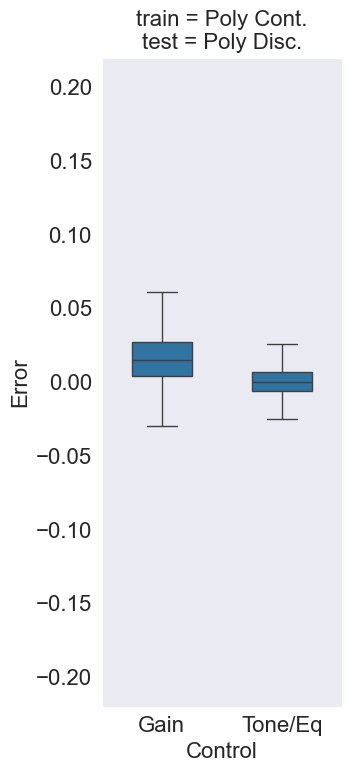

In [13]:
# BOX PLOT
err_df_poly_disc = pd.DataFrame(data={
    'Gain': test_df_poly_disc['gain_err'],
    'Tone/Eq': test_df_poly_disc['tone_eq1_err'],
})

plt.figure(figsize=(3.8,8))
plt.grid(False)
ax = utils.box_plot(error_dataframe=err_df_poly_disc, title='train = Poly Cont.\ntest = Poly Disc.', title_fontsize=16, text_fontsize=16)
ax.set(ylim=(-0.22,0.22))
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_bp_PC_PD.eps'), format='eps')

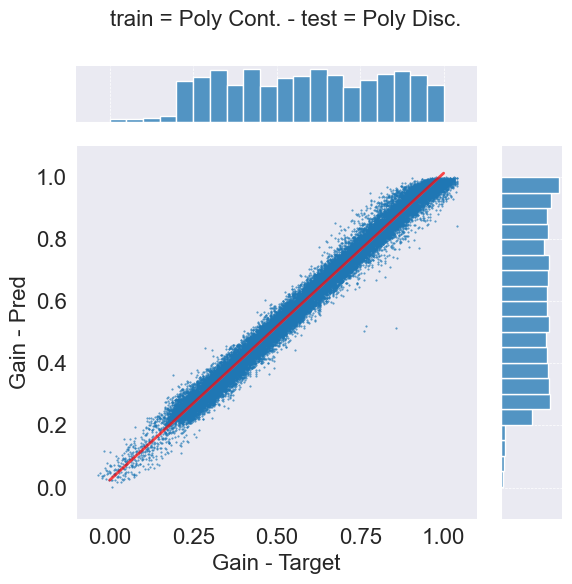

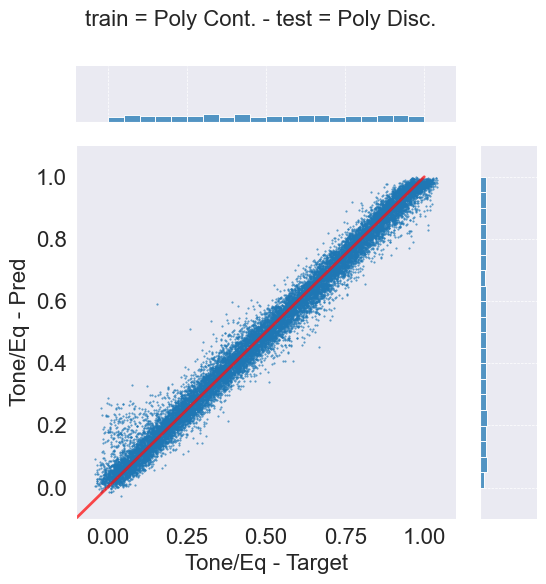

In [14]:
# SCATTER PLOT
# gain
ax = utils.scatter_plot(
    x="gain_targ", y="gain_pred", dataframe=test_df_poly_disc, 
    title='train = Poly Cont. - test = Poly Disc.', title_fontsize=16, 
    text_fontsize=16, xlabel='Gain - Target', ylabel='Gain - Pred'
)

ax.ax_marg_x.set_xlim(-0.1, 1.1)
ax.ax_marg_y.set_ylim(-0.1, 1.1)
plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_sp_gain_PC_PD.png'), format='png')

# tone/eq1
ax = utils.scatter_plot(
    x="tone_eq1_targ", y="tone_eq1_pred", dataframe=test_df_poly_disc, 
    title='train = Poly Cont. - test = Poly Disc.', title_fontsize=16, 
    text_fontsize=16, xlabel='Tone/Eq - Target', ylabel='Tone/Eq - Pred',
    bins=40
)

ax.ax_marg_x.set_xlim(-0.1, 1.1)
ax.ax_marg_y.set_ylim(-0.1, 1.1)
plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_sp_tone_PC_PD.png'), format='png')

[ 0.05   0.021  0.03   0.017  0.017 -0.02 ]
[ 0.039  0.007 -0.001 -0.002 -0.023]
[ 0.598 -0.431 -0.044  0.537 -3.656 -3.858]
[ 2.388  1.043  0.013 -0.321 -3.822]


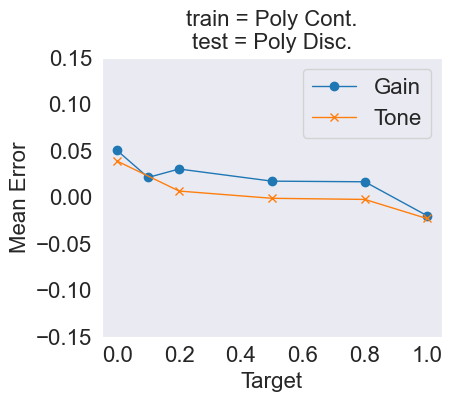

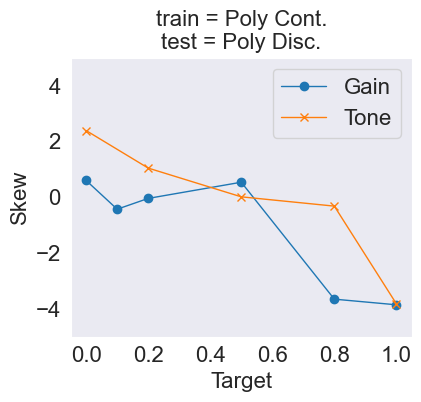

In [15]:
# MEAN ERROR and SKEW PLOTS
steps_gain = [0.0, 0.1, 0.2, 0.5, 0.8, 1.0]
steps_tone = [0.0, 0.2, 0.5, 0.8, 1.0]
avg_err_gain = []
avg_err_tone = []
skew_gain = []
skew_tone = []

for n in range(len(steps_gain)):
    df = test_df_poly_disc[test_df_poly_disc['gain_targ'] == steps_gain[n]]
    avg_err_gain.append(sum(df['gain_err']) / len(df))
    skew_gain.append(scipy.stats.skew(df['gain_err']))

for n in range(len(steps_tone)):
    df = test_df_poly_disc[test_df_poly_disc['tone_eq1_targ'] == steps_tone[n]]
    avg_err_tone.append(sum(df['tone_eq1_err']) / len(df))
    skew_tone.append(scipy.stats.skew(df['tone_eq1_err']))

print(np.around(avg_err_gain,3))
print(np.around(avg_err_tone,3))
print(np.around(skew_gain,3))
print(np.around(skew_tone,3))

# mean error
plt.figure(figsize=(4.8,4.3))
utils.line_plot(
    x_gain=steps_gain, x_tone=steps_tone, 
    y_gain=avg_err_gain, y_tone=avg_err_tone, 
    title='train = Poly Cont.\ntest = Poly Disc.' , title_fontsize=16, 
    text_fontsize=16, xlabel='Target', ylabel='Mean Error'
)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.15, 0.15])
plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_me_PC_PD.eps'), format='eps')

# skew
plt.figure(figsize=(4.5,4.3))
utils.line_plot(
    x_gain=steps_gain, x_tone=steps_tone, 
    y_gain=skew_gain, y_tone=skew_tone, 
    title='train = Poly Cont.\ntest = Poly Disc.' , title_fontsize=16, 
    text_fontsize=16, xlabel='Target', ylabel='Skew'
)

plt.xlim([-0.05, 1.05])
plt.ylim([-5, 5])
plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_sk_PC_PD.eps'), format='eps')